In [1]:
import numpy as np
import pandas as pd

In [2]:
# https://archive.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset
df = pd.read_csv('predictive_maintenance.csv')
df.head()

,UDI,Product ID,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UDI                  10000 non-null  int64  
 1   Product ID           10000 non-null  object 
 2   Type                 10000 non-null  object 
 3   Air temperature      10000 non-null  float64
 4   Process temperature  10000 non-null  float64
 5   Rotational speed     10000 non-null  int64  
 6   Torque               10000 non-null  float64
 7   Tool wear            10000 non-null  int64  
 8   Target               10000 non-null  int64  
 9   Failure Type         10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [4]:
df.isna().sum()

UDI                    0
Product ID             0
Type                   0
Air temperature        0
Process temperature    0
Rotational speed       0
Torque                 0
Tool wear              0
Target                 0
Failure Type           0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.columns[:2]

Index(['UDI', 'Product ID'], dtype='object')

In [7]:
# drop kolom UDI, Product ID
df.drop(df.columns[:2] , axis = 1, inplace = True)

In [8]:
# cek apakah ada kolom bertipe data object
cat_cols = df.select_dtypes(include = 'O').columns.tolist()
cat_cols

['Type', 'Failure Type']

In [9]:
# cek isi kolom bertipe data object
for col in cat_cols :
    print(df[col].value_counts())

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64
Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64


In [10]:
# mapping data-data pada kolom Failure Type menjadi integer
df['Failure Type'] = df['Failure Type'].replace(['No Failure','Heat Dissipation Failure','Power Failure','Overstrain Failure','Tool Wear Failure','Random Failures'], [1,2,3,4,5,6])
df

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,1
1,L,298.2,308.7,1408,46.3,3,0,1
2,L,298.1,308.5,1498,49.4,5,0,1
3,L,298.2,308.6,1433,39.5,7,0,1
4,L,298.2,308.7,1408,40.0,9,0,1
...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,1
9996,H,298.9,308.4,1632,31.8,17,0,1
9997,M,299.0,308.6,1645,33.4,22,0,1
9998,H,299.0,308.7,1408,48.5,25,0,1


In [11]:
# cek apakah ada data dgn nilai Target = 1 (Failure)
df_f = df[df.Target == 1]
df_f['Failure Type'].value_counts()

Failure Type
2    112
3     95
4     78
5     45
1      9
Name: count, dtype: int64

In [12]:
# cek Failure Type = 'No Failure' di dalam data dengan Target = 1
df_f[df_f['Failure Type'] == 'No Failure']

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type


In [13]:
df_f[df_f['Failure Type'] == 'No Failure'].index

Index([], dtype='int64')

In [14]:
idx = df_f[df_f['Failure Type'] == 'No Failure'].index

In [15]:
# hapus data anomali tsb
df.drop(idx , axis =0 , inplace = True )

In [16]:
# sisa data
df_f = df[df.Target == 0]
df_f['Failure Type'].value_counts()

Failure Type
1    9643
6      18
Name: count, dtype: int64

In [17]:
df_f2 = df[df.Target == 1]
df_f2['Failure Type'].value_counts()

Failure Type
2    112
3     95
4     78
5     45
1      9
Name: count, dtype: int64

In [20]:
df['Failure Type'].value_counts()

Failure Type
1    9652
2     112
3      95
4      78
5      45
6      18
Name: count, dtype: int64

In [24]:
# drop Failure Type = Random Failures
idx = df_f2[df_f2['Failure Type'] == 'Random Failures'].index
df_f2.drop(idx , axis =0 , inplace = True )

C:\Users\ardma\AppData\Local\Temp\ipykernel_6096\296338960.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f2.drop(idx , axis =0 , inplace = True )


In [25]:
df_f2

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
50,L,298.9,309.1,2861,4.6,143,1,3
69,L,298.9,309.0,1410,65.7,191,1,3
77,L,298.8,308.9,1455,41.3,208,1,5
160,L,298.4,308.2,1282,60.7,216,1,4
161,L,298.3,308.1,1412,52.3,218,1,4
...,...,...,...,...,...,...,...,...
9758,L,298.6,309.8,2271,16.2,218,1,5
9764,L,298.5,309.5,1294,66.7,12,1,3
9822,L,298.5,309.4,1360,60.9,187,1,4
9830,L,298.3,309.3,1337,56.1,206,1,4


In [36]:
df

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
0,1,298.1,308.6,1551,42.8,0,0,1
1,2,298.2,308.7,1408,46.3,3,0,1
2,2,298.1,308.5,1498,49.4,5,0,1
3,2,298.2,308.6,1433,39.5,7,0,1
4,2,298.2,308.7,1408,40.0,9,0,1
...,...,...,...,...,...,...,...,...
9995,1,298.8,308.4,1604,29.5,14,0,1
9996,3,298.9,308.4,1632,31.8,17,0,1
9997,1,299.0,308.6,1645,33.4,22,0,1
9998,3,299.0,308.7,1408,48.5,25,0,1


In [37]:
# mapping data-data pada kolom Type menjadi integer
df['Type'] = df['Type'].replace(['M','L','H'], [1,2,3])
df

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
0,1,298.1,308.6,1551,42.8,0,0,1
1,2,298.2,308.7,1408,46.3,3,0,1
2,2,298.1,308.5,1498,49.4,5,0,1
3,2,298.2,308.6,1433,39.5,7,0,1
4,2,298.2,308.7,1408,40.0,9,0,1
...,...,...,...,...,...,...,...,...
9995,1,298.8,308.4,1604,29.5,14,0,1
9996,3,298.9,308.4,1632,31.8,17,0,1
9997,1,299.0,308.6,1645,33.4,22,0,1
9998,3,299.0,308.7,1408,48.5,25,0,1


In [38]:
# list kolom-kolom yg berisi data numerik
num_cols = df.select_dtypes(exclude = 'O').columns.tolist()
num_cols

['Type',
 'Air temperature',
 'Process temperature',
 'Rotational speed',
 'Torque',
 'Tool wear',
 'Target',
 'Failure Type']

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [40]:
for i , col in enumerate(num_cols,1):
    print(i , col)

1 Type
2 Air temperature
3 Process temperature
4 Rotational speed
5 Torque
6 Tool wear
7 Target
8 Failure Type


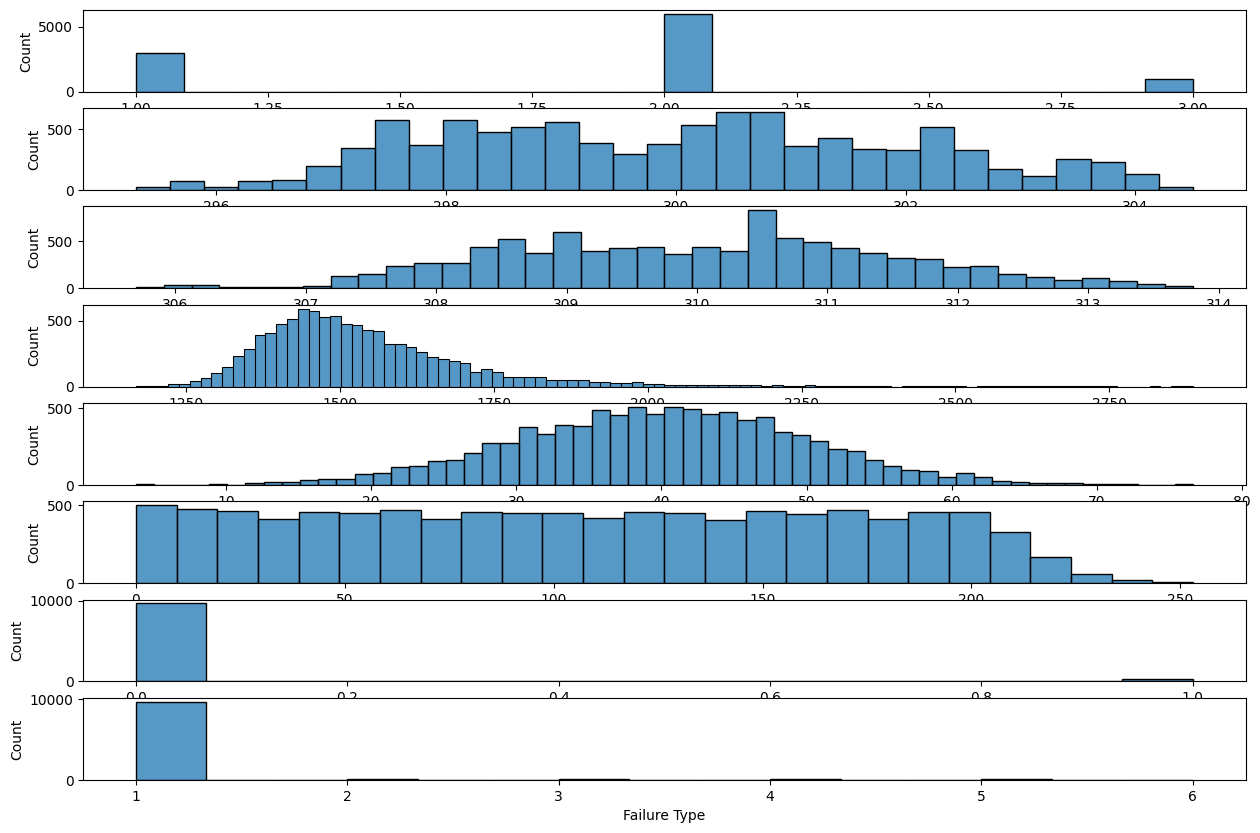

In [42]:
# visualisasi data
plt.figure(figsize = (15 , 10))
for i , col in enumerate(num_cols,1):
    plt.subplot(8,1,i)
    sns.histplot(data = df , x= col)

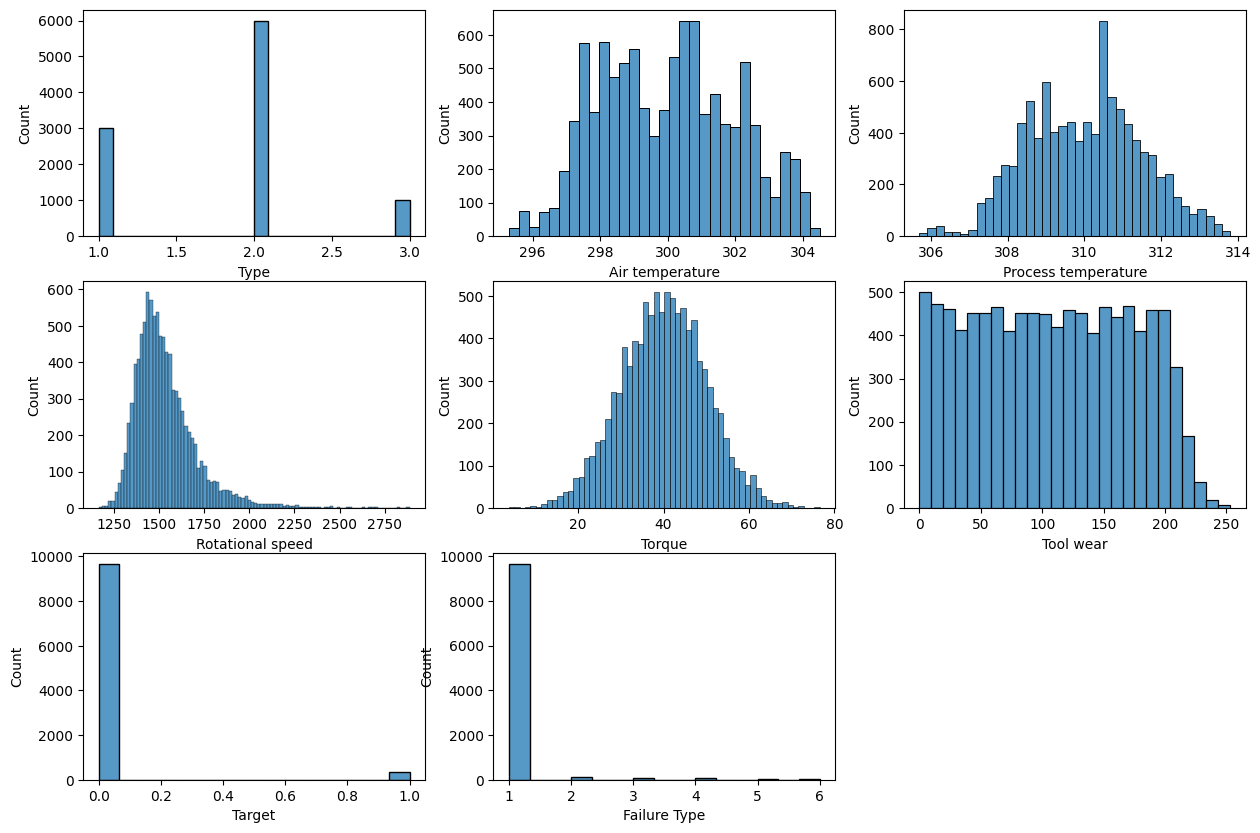

In [43]:
plt.figure(figsize = (15 , 10))
for i , col in enumerate(num_cols,1):
    plt.subplot(3,3,i)
    sns.histplot(data = df , x= col)

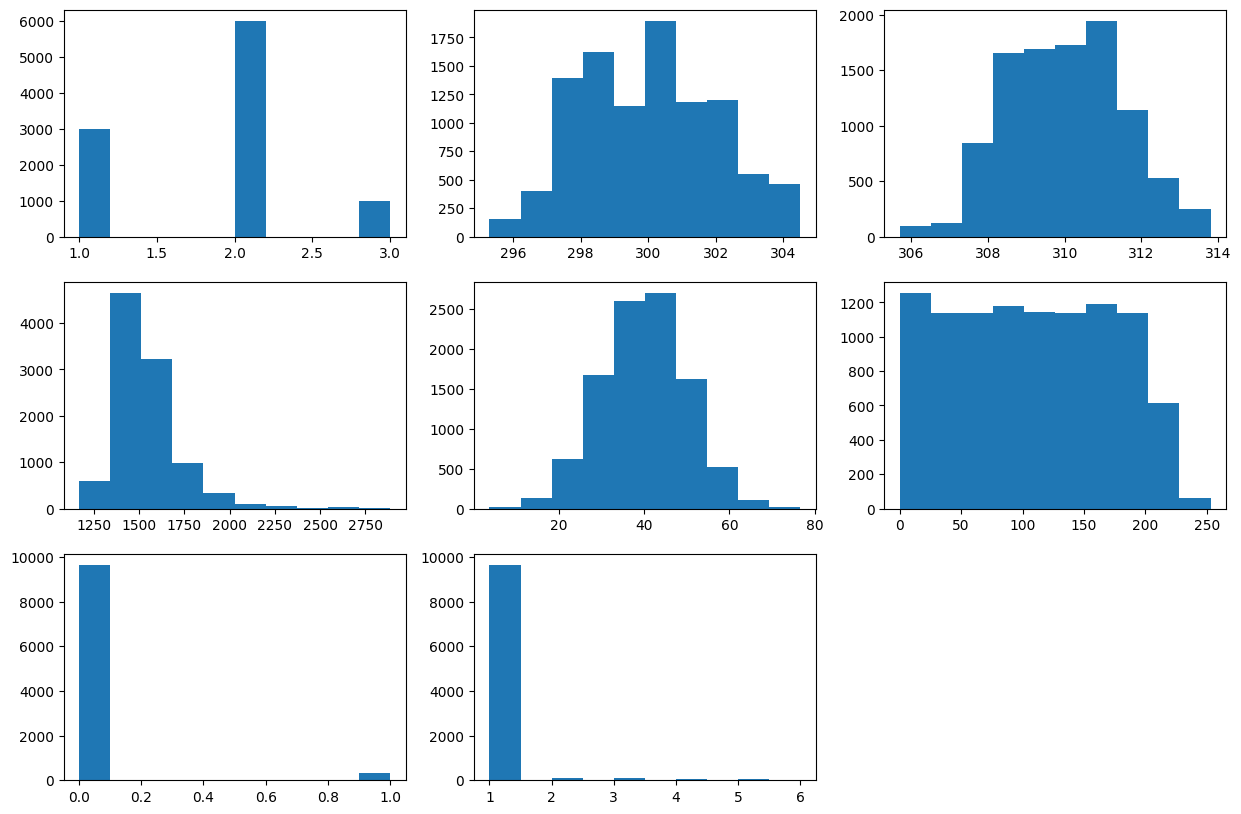

In [44]:
plt.figure(figsize = (15 , 10))
for i , col in enumerate(num_cols,1):
    plt.subplot(3,3,i)
    plt.hist(data = df , x= col)

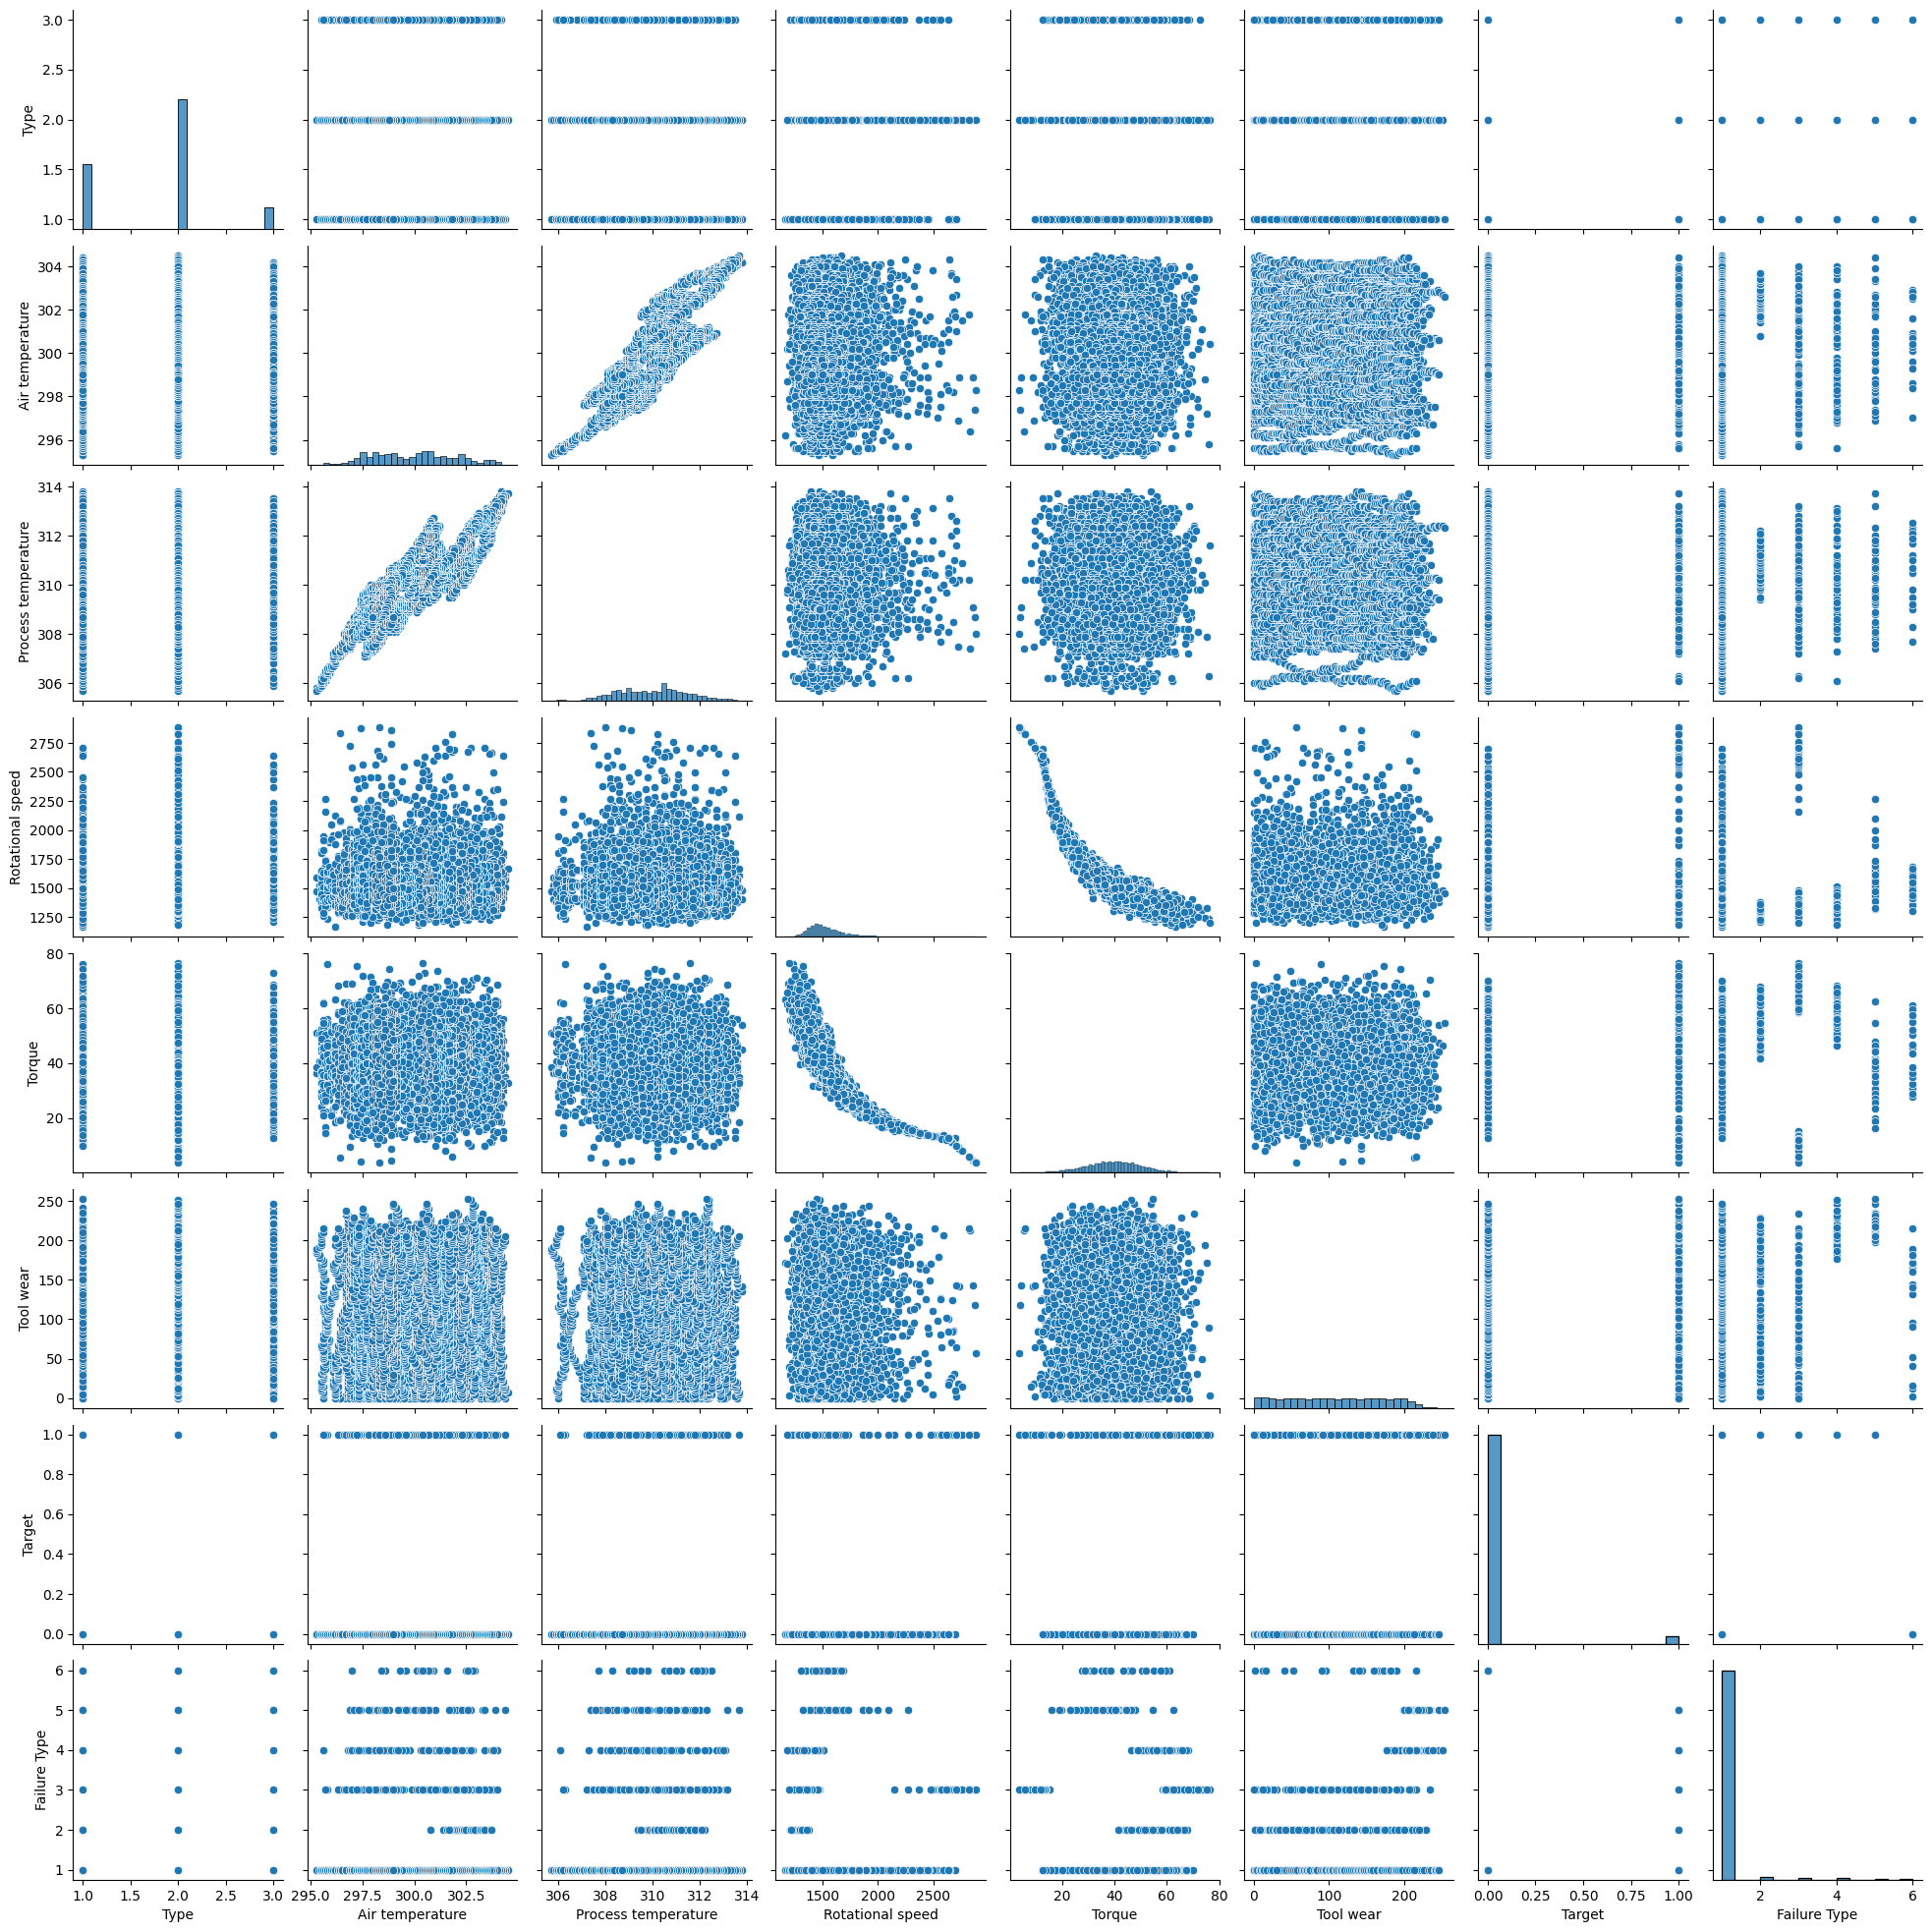

In [45]:
sns.pairplot(df)

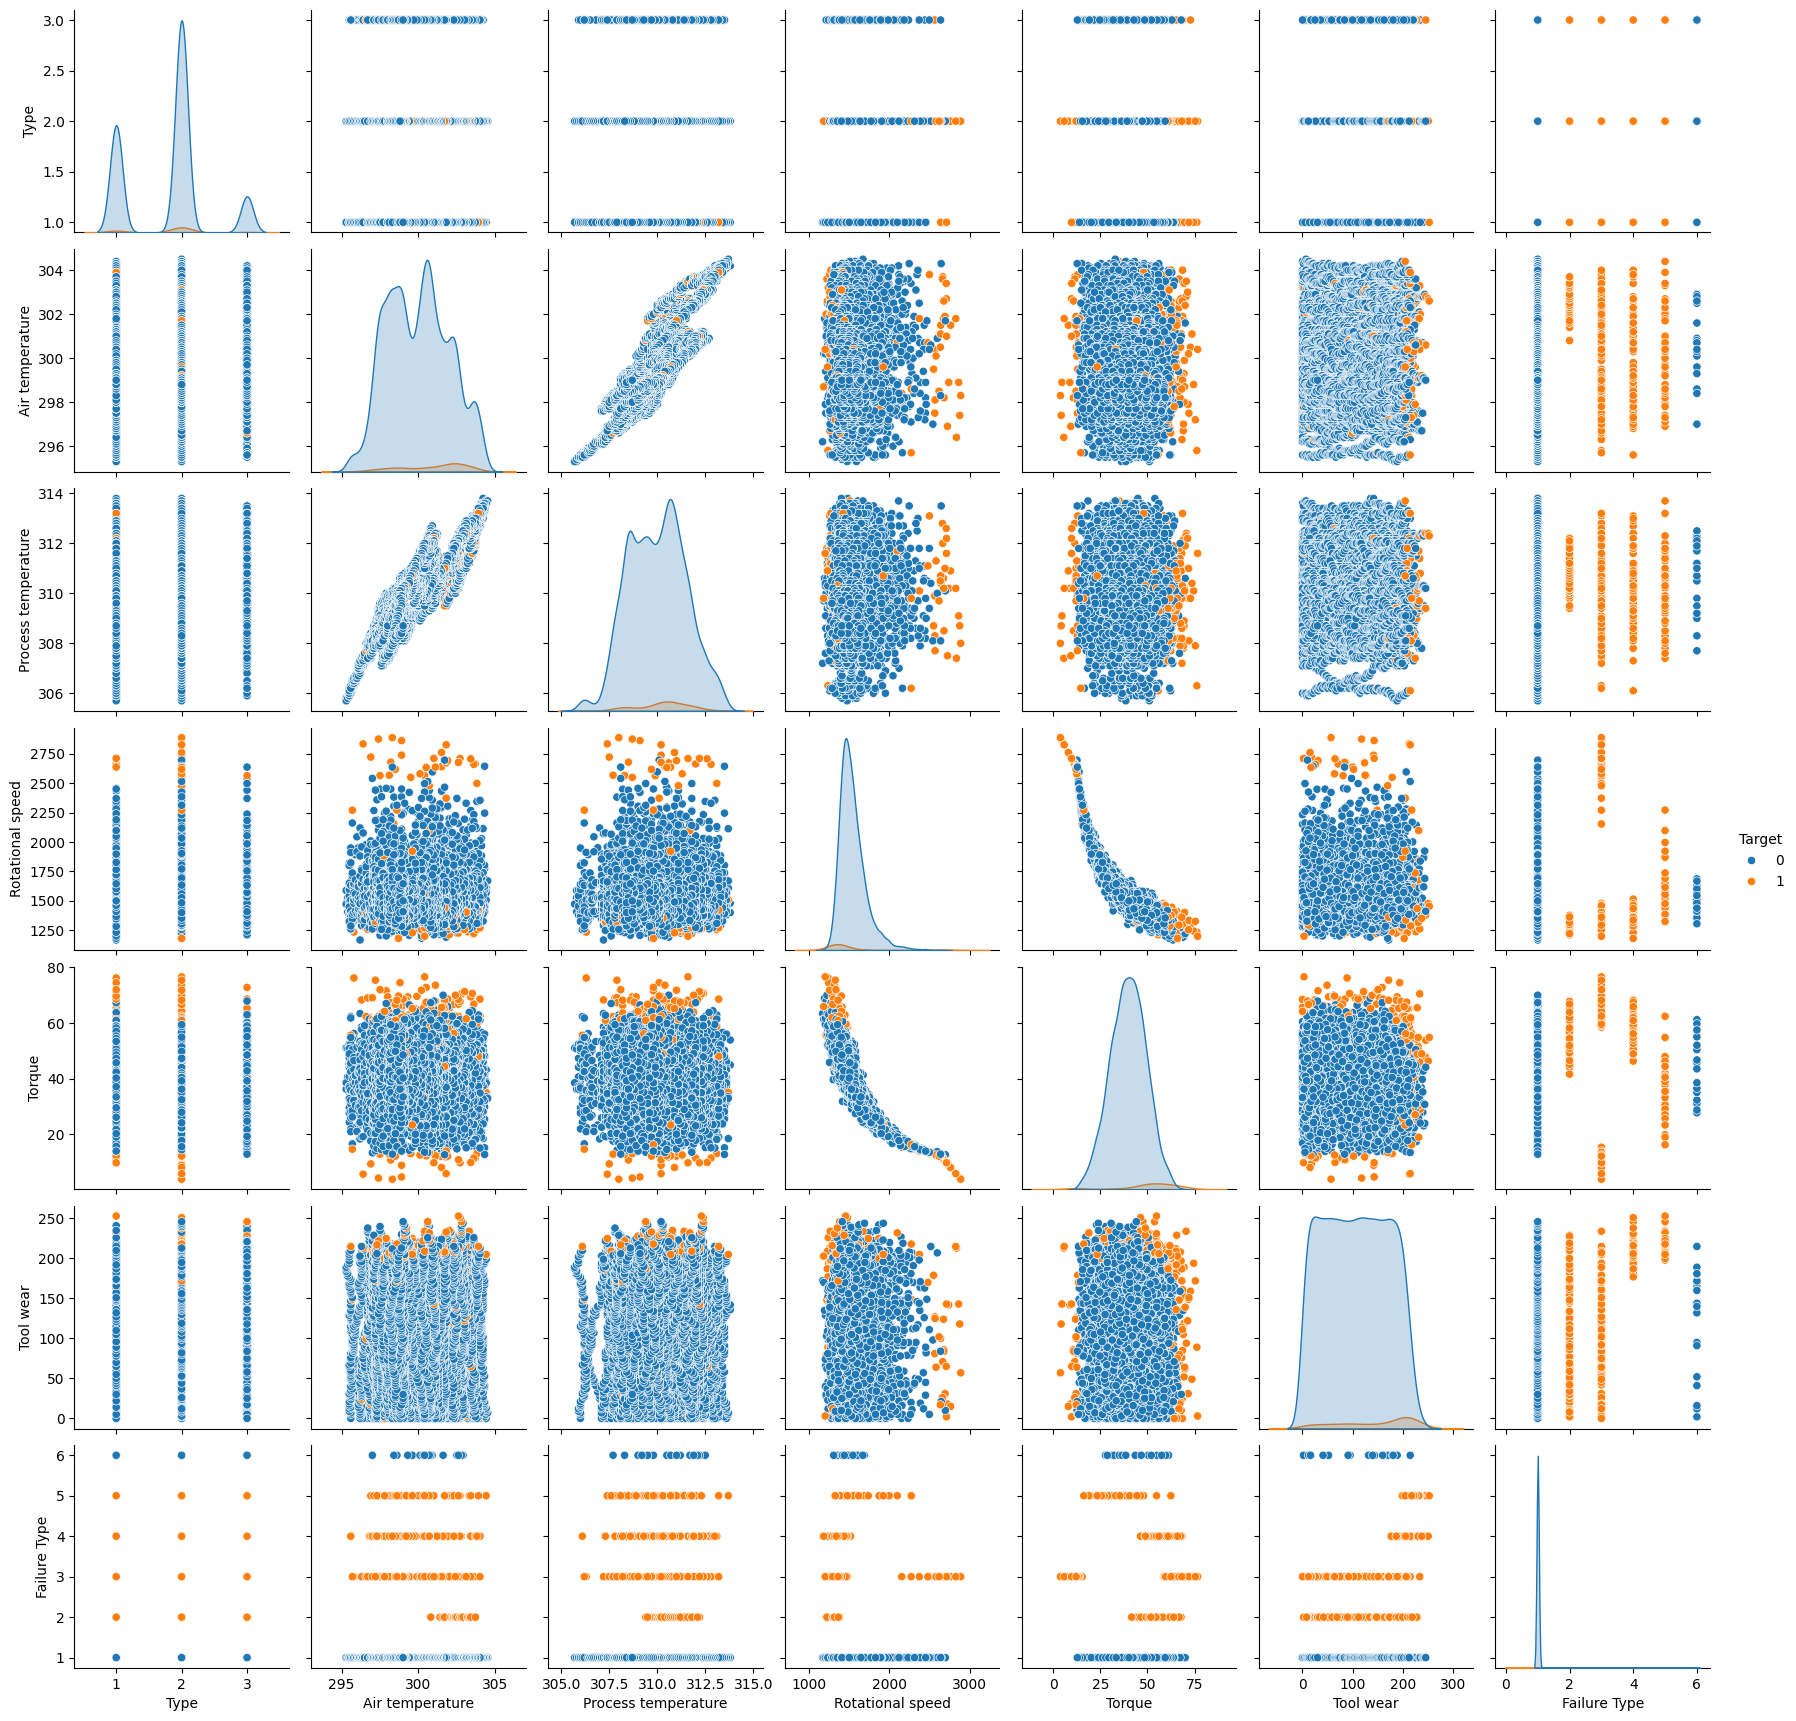

In [46]:
sns.pairplot(df , hue = 'Target')

In [47]:
df.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
0,1,298.1,308.6,1551,42.8,0,0,1
1,2,298.2,308.7,1408,46.3,3,0,1
2,2,298.1,308.5,1498,49.4,5,0,1
3,2,298.2,308.6,1433,39.5,7,0,1
4,2,298.2,308.7,1408,40.0,9,0,1


In [48]:
df.columns[-2:]

Index(['Target', 'Failure Type'], dtype='object')

In [49]:
x = df.drop(df.columns[-2:] , axis = 1 )
y = df['Failure Type']

In [50]:
x

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
0,1,298.1,308.6,1551,42.8,0
1,2,298.2,308.7,1408,46.3,3
2,2,298.1,308.5,1498,49.4,5
3,2,298.2,308.6,1433,39.5,7
4,2,298.2,308.7,1408,40.0,9
...,...,...,...,...,...,...
9995,1,298.8,308.4,1604,29.5,14
9996,3,298.9,308.4,1632,31.8,17
9997,1,299.0,308.6,1645,33.4,22
9998,3,299.0,308.7,1408,48.5,25


In [54]:
y

0       1
1       1
2       1
3       1
4       1
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: Failure Type, Length: 10000, dtype: int64

In [51]:
# gunakan train_test_split pada library scikit-learn 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [52]:
X_train

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
8371,2,298.7,309.7,1881,21.7,29
5027,2,304.0,313.3,1294,54.6,102
9234,2,298.3,309.1,1904,20.3,140
3944,2,302.2,311.2,1381,49.4,207
6862,1,301.1,311.2,1384,49.4,48
...,...,...,...,...,...,...
5734,2,302.3,311.8,1369,56.2,208
5191,2,304.0,313.2,1416,46.0,128
5390,3,302.8,312.3,1483,47.2,223
860,3,296.1,306.9,1541,32.6,33


In [56]:
y_train

8371    1
5027    1
9234    1
3944    1
6862    1
       ..
5734    4
5191    1
5390    1
860     1
7270    1
Name: Failure Type, Length: 6700, dtype: int64

### Modelling: Logistic Regression, Support Vector Classifier

In [57]:
# modelling menggunakan Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

d:\STUDY\ML\Predictive Maintenance\1-kihome\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
logreg.score(X_train, y_train)

0.9649253731343284

In [59]:
logreg.score(X_test, y_test)

0.9687878787878788

In [60]:
# cek, modelling menggunakan Support Vector Classifier (SVC) 
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [61]:
svc.score(X_train, y_train)

0.9644776119402985

In [62]:
svc.score(X_test, y_test)

0.9681818181818181

In [63]:
# cek, modelling menggunakan SVC dengan kernel RBF (Radial Basis Function)
from sklearn.svm import SVC
rsvc = SVC(kernel = 'rbf')
rsvc.fit(X_train, y_train)

SVC()

In [64]:
rsvc.score(X_train, y_train)

0.9644776119402985

In [65]:
rsvc.score(X_test, y_test)

0.9681818181818181

In [68]:
# Prediksi menggunakan model yang telah dilatih sebelumnya
# trained_model = SVC()
trained_model = LogisticRegression()

trained_model.fit(X_train, y_train)

# Data fitur yang ingin diprediksi
new_data = pd.DataFrame({
    'Type': [1],
    'Air temperature': [298],
    'Process temperature': [309],
    'Rotational speed': [2861],
    'Torque': [4],
    'Tool wear': [143]
})

# Melakukan prediksi
predicted_target = trained_model.predict(new_data)

# Menampilkan hasil prediksi
print("Hasil Prediksi:", predicted_target)


Hasil Prediksi: [3]


d:\STUDY\ML\Predictive Maintenance\1-kihome\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [88]:
# contoh lain
X = np.array([[2, 298, 308, 1551, 42, 0]])
hasilprediksi = trained_model.predict(X)
hasilprediksi

#if hasilprediksi == 0:
#    print("Tidak ada kerusakan mesin")
#else:
#    print("Terdapat kerusakan mesin")

if hasilprediksi == 1:
    print("No Failure")
elif hasilprediksi == 2:
    print("Heat Dissipation Failure")
elif hasilprediksi == 3:
    print("Power Failure")
elif hasilprediksi == 4:
    print("Overstrain Failure")
elif hasilprediksi == 5:
    print("Tool Wear Failure")              


No Failure


d:\STUDY\ML\Predictive Maintenance\1-kihome\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [69]:
# generate file model ML .sav untuk web
import pickle
filename = 'model_prediksi_kerusakan_logreg_failtype.sav'
pickle.dump(trained_model, open(filename, 'wb'))

### Percobaan Optimasi Modelling: Transformer
(hasil evaluasi lebih kecil, yaitu 82%)

In [70]:
# create list kolom bertipe data Object
cat_cols = X_train.select_dtypes(include = 'O').columns.tolist()
cat_cols

[]

In [71]:
# create list kolom bertipe data Selain Object (numerik)
num_cols = X_train.select_dtypes(exclude = 'O').columns.tolist()
num_cols

['Type',
 'Air temperature',
 'Process temperature',
 'Rotational speed',
 'Torque',
 'Tool wear']

In [72]:
# buat dua transformer, yaitu OneHotEncoder dan StandardScaler, 
# dan kemudian menggabungkannya menggunakan ColumnTransformer

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# OneHotEncoder digunakan untuk mengubah variabel kategori (categorical variables)
# menjadi representasi biner (one-hot encoding)
enc = OneHotEncoder(handle_unknown='ignore')

# StandardScaler digunakan untuk melakukan penskalaan fitur numerik (numerical features)
# agar memiliki mean 0 dan deviasi standar 1
sc = StandardScaler()
ct = ColumnTransformer(
    [
        ('encoding' , enc , cat_cols ) ,
        ('scaling' , sc , num_cols)
    ]
)

In [73]:
X_train_ct = ct.fit_transform(X_train)
X_test_ct = ct.transform(X_test)

In [74]:
y.value_counts()

Failure Type
1    9652
2     112
3      95
4      78
5      45
6      18
Name: count, dtype: int64

In [75]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train_ct, y_train)

In [76]:
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(1, 10), (2, 10), (3, 10), (4, 10), (5, 10), (6, 10)]


In [77]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X_train_ct, y_train)

In [78]:
print(sorted(Counter(y_resampled).items()))

[(1, 6458), (2, 6458), (3, 6458), (4, 6458), (5, 6458), (6, 6458)]


In [79]:
logreg.fit(X_resampled , y_resampled)

d:\STUDY\ML\Predictive Maintenance\1-kihome\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [80]:
logreg.score(X_resampled , y_resampled)

0.8846908227521421

In [82]:
logreg.score(X_resampled , y_resampled)

0.8846908227521421

In [87]:
from imblearn.pipeline import Pipeline

# Definisi rasio over-sampling untuk setiap kelas (dictionary)
sampling_strategy_dict = {1: 7000, 2: 70, 3: 50, 4: 40, 5: 30, 6: 7}

over = SMOTE(sampling_strategy=sampling_strategy_dict)
und = RandomUnderSampler()
pipe = Pipeline(
    [
        ('o' , over) ,
        ('u' , und)
    ]
    )
x_s ,y_s = pipe.fit_resample(X_resampled , y_resampled)

ValueError: With over-sampling methods, the number of samples in a class should be greater or equal to the original number of samples. Originally, there is 6458 samples and 70 samples are asked.

In [58]:
print(sorted(Counter(y_s).items()))

[(0, 3223), (1, 3223)]


In [59]:
logreg.fit(x_s, y_s)

LogisticRegression()

In [60]:
logreg.score(X_test_ct , y_test)

0.8210814094775213